In [63]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [64]:
def _dist(p,q):
    # compute and return the euclidean distance
    distance=np.sqrt(np.sum(np.square(p-q)))
    return distance

In [65]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    return _dist(p,q) < eps

In [66]:
def _region_query(m, point_id, eps):
    # m: 數據集,array
    # point_id: 當前點
    
    # number of point
    # shape函式可以返回陣列的形狀
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # 以 point_id 為中心的所有 eps-neighborhood，放到seeds
    for i in range(0,n_points):
        # 找不是自己本身其他點
        if not i == point_id:
            # 該 point_id 和 i 的距離符合 _eps_neighborhood 條件
            if _eps_neighborhood(m[:,point_id],m[:,i],eps):
                seeds.append(i)
    return seeds

In [81]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # m: 數據集,array
    # classifications: 分類結果
    # point_id: 當前點
    # cluster_id: 分類類別
    # eps: 同一域下樣本最大距離
    # min_points: 每個簇最小核心點數
    
    # expand the cluster of cluster_id from point_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    
    # seeds:該 point_id 和 i 的距離符合 _eps_neighborhood 條件
    seeds = _region_query(m, point_id, eps)
    # 符合距離條件的候選點們不滿足形成簇的最小點數
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    # 滿足距離條件和點數條件
    # identify all points belonging to cluster_id
    else:
        # 當前的點為該 cluster
        classifications[point_id] = cluster_id
        # 當前的點與 seeds 為該 cluster
        for seed_id in seeds:
            classifications[seed_id] = cluster_id
        
        # 直到沒有 seeds 為中心可以拓展
        while len(seeds) > 0:
            # from the seeds list
            # 所有 x
            current_point = seeds[0]
            # keep expending
            results = _region_query(m, current_point, eps)
            if len(results) >= min_points:
                for i in range(0, len(results)):
                    result_point = results[i]
                    # 尚未分類的點 append 到 seeds
                    if classifications[result_point] == UNCLASSIFIED:
                        seeds.append(result_point)
                    # 拓展 result point 為該 cluster
                    classifications[result_point] = cluster_id
            # expend seeds and updating seeds
            seeds = seeds[1:]
        return True

In [82]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    
    # m : [[所有 x ][所有 y]]
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    for point_id in range(0, n_points):
        #point = m[:,point_id]
        # 當前的點尚未被分類
        if classifications[point_id] == UNCLASSIFIED:
            # if return true
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id = cluster_id + 1
    
    return classifications

In [94]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [84]:
eps = 1.6
min_points = 5
a=dbscan(m, eps, min_points)

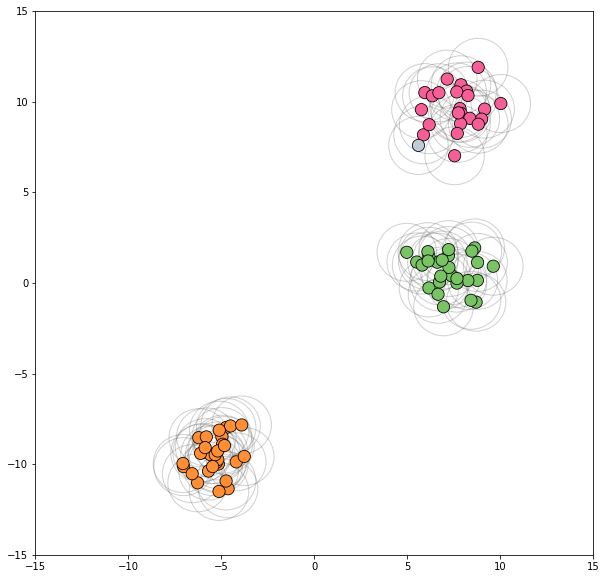

In [85]:
%matplotlib inline
import dbscan_lab_helper as helper
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [86]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [87]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

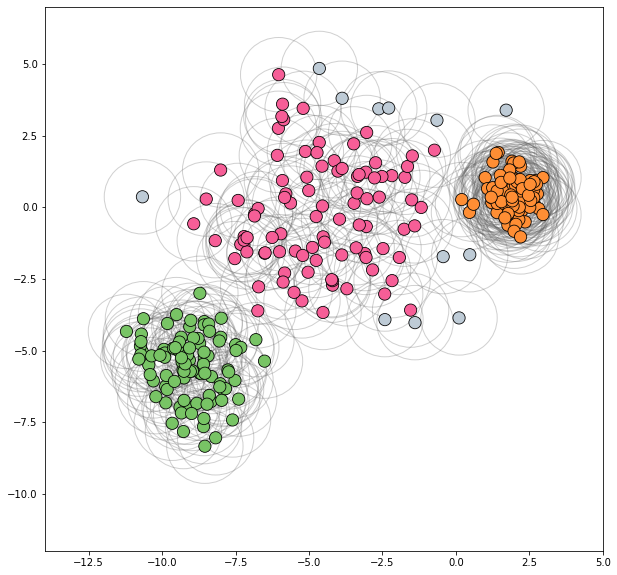

In [54]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
